In [ ]:
!pip install umap-learn

In [16]:
import numpy as np
import pandas as pd
import umap
import matplotlib.pyplot as plt

In [4]:
counts = pd.read_csv('file path')

In [5]:
df= counts.transpose()

In [6]:
# Extract the first row as column names
df.columns = df.iloc[0]

# Drop the first row, which now contains the column names
df = df[1:]

In [7]:
metadata = pd.read_csv('metadata csv')

In [8]:
# Set the first column 'Name' as the index
metadata.set_index('sample_ID', inplace=True)

In [ ]:
metadata

In [ ]:
df

In [12]:
merged_df = pd.merge(df, metadata, left_index=True, right_index=True)

In [17]:
umap = umap.UMAP(n_components=2)

In [18]:
# Fit the UMAP model to the log-transformed count matrix
umap_embedding = umap.fit_transform(df)

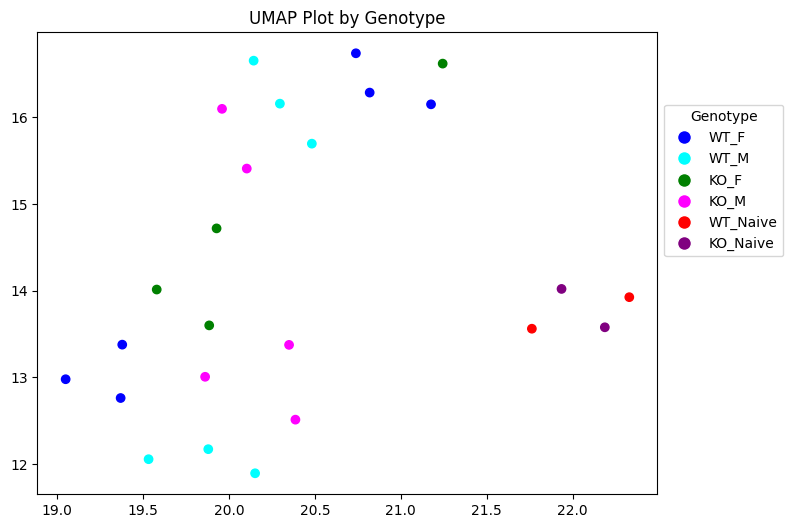

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import umap

# Assuming you already have the necessary data loaded: df, metadata, and umap_embedding

# Create a UMAP plot with distinct colors for each genotype
plt.figure(figsize=(8, 6))

# Define custom colors for each genotype
genotype_colors = {
    'WT_F': 'blue',
    'WT_M': 'cyan',
    'KO_F': 'green',
    'KO_M': 'magenta',
    'WT_Naive': 'red',
    'KO_Naive': 'purple'
}

# Map the genotype labels to colors
colors = [genotype_colors[genotype] for genotype in metadata['Genotype']]


# Scatter plot with custom colors
scatter = plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], c=colors)

# Create a legend for genotypes
legend_labels = list(genotype_colors.keys())
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=genotype_colors[label], markersize=10, label=label) for label in legend_labels]
plt.legend(handles=legend_handles, title='Genotype', loc='lower left', bbox_to_anchor=(1, 0.5))

# Set plot title
plt.title('UMAP Plot by Genotype')

# Show the plot
plt.show()

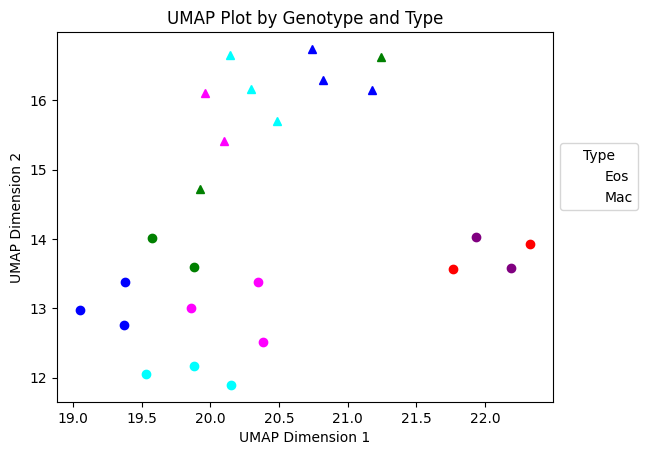

In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import umap

# Assuming you already have the necessary data loaded: df, metadata, and umap_embedding

# Define custom marker styles for each type
type_markers = {
    'Eos': '^',  # Use '^' for triangles
    'Mac': 'o'   # Use 'o' for circles
}

# Create a list of colors for each type
#colors = [genotype_colors[genotype] for genotype in metadata['Genotype']]

# Plot the scatter plot with custom marker styles and colors
for i in range(len(metadata)):
    type = metadata['Type'][i]
    color = colors[i]
    marker = type_markers[type]
    plt.plot(umap_embedding[i, 0], umap_embedding[i, 1], marker=marker, color=color, label=type)

# Create a legend for types
unique_types = metadata['Type'].unique()
legend_handles = [plt.Line2D([0], [0], marker=type_markers[type], color='w', markerfacecolor=None, markersize=10, label=type) for type in unique_types]
plt.legend(handles=legend_handles, title='Type', loc='lower left', bbox_to_anchor=(1, 0.5))

#Create a legend for genotypes
legend_labels = list(genotype_colors.keys())
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=genotype_colors[label], markersize=10, label=label) for label in legend_labels]
plt.legend(handles=legend_handles, title='Genotype', loc='lower left', bbox_to_anchor=(1, 0.65))

# Set plot title
plt.title('UMAP Plot by Genotype and Type')

# Add titles to the x and y axes
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')

# Show the plot
plt.show()


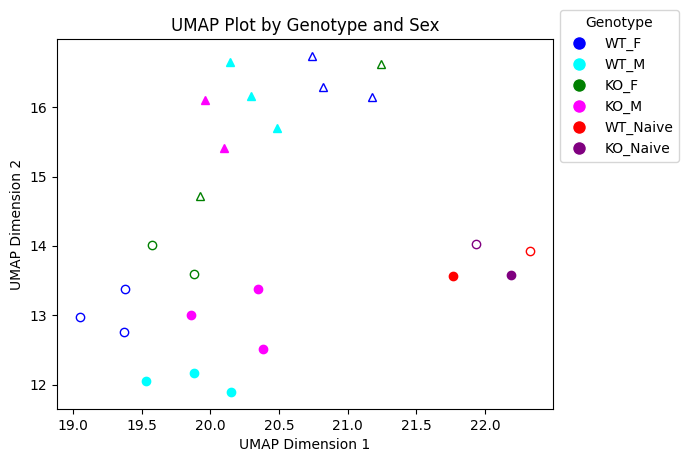

In [47]:
import matplotlib.pyplot as plt
import pandas as pd
import umap

# Assuming you already have the necessary data loaded: df, metadata, and umap_embedding

# Define custom marker styles for each type
type_markers = {
  'Eos': '^', # Use '^' for triangles
  'Mac': 'o'  # Use 'o' for circles
}

# Create a list of colors for each type
colors = [genotype_colors[genotype] for genotype in metadata['Genotype']]

# Create a list of fill colors for each sex
fill_colors = []
for i in range(len(metadata)):
  sex = metadata['Sex'][i]
  if sex == 'F':
   fill_colors.append('None')
  else:
   fill_colors.append(colors[i])

# Plot the scatter plot with custom marker styles, colors, and fill colors
for i in range(len(metadata)):
  type = metadata['Type'][i]
  color = colors[i]
  marker = type_markers[type]
  fill_color = fill_colors[i]
  plt.plot(umap_embedding[i, 0], umap_embedding[i, 1], marker=marker, color=color, markerfacecolor=fill_color)

# Create a legend for type_markers
legend_labels = ['Eos (Triangle)', 'Mac (Circle)']
legend_handles = [plt.Line2D([0], [0], marker=marker, color='w', markerfacecolor=None, markersize=10, label=label) for label, marker in type_markers.items()]
plt.legend(handles=legend_handles, title='Type Markers', loc='lower left', bbox_to_anchor=(1, 0.5))

# Create a legend for genotypes
legend_labels = list(genotype_colors.keys())
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=genotype_colors[label], markersize=10, label=label) for label in legend_labels]
plt.legend(handles=legend_handles, title='Genotype', loc='lower left', bbox_to_anchor=(1, 0.65))

# Set plot title
plt.title('UMAP Plot by Genotype and Sex')

# Add titles to the x and y axes
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')

# Show the plot
plt.show()
